# US Election 2020 Campaign Plan to Citizens in the Rural, Low-income,  Less Educated Communities 

### Introduction
The US Election of 2016 full of drama as scandals of candidates sprung up countlessly throughout the process and a candidate with no official politial background ultimately got elected as President of the US. The presidential outcome has led a conversation on how polarized the communities are across the country; media often underrepresents groups, such as communities in the rural, low-income areas. To explore which groups exist across the states, I chose this dataset of the US primarie results in 2016. 

### Background
I acquired this dataset from Kaggle. It could be accessed here: https://www.kaggle.com/benhamner/2016-us-election/data. 

Initially, the link consists of 3 files: county_facts, county_facts_dictionary, and primary_results.
* *county_facts:* This data file originally consisted of 3195 rows and 54 columns, including demographic information for all counties, states and the US overall. The demographic areas covered were race, education level, income level, etc.
* *county_facts_dictionary:* This was a file complementing the first file. It included all legible names for the columns in county_facts, which were originally written in code. 
* *primary_results:* This file includes rows for all counties across the country with the amount of votes each party candidate received for that county. The original file had 24,611 rows and 8 columns.  

It is important to note here that the US primaries are held independently. The vote is not held on the same date for both parties. Also, some states do not hold primary vote for the Republican nominee for other methods of selecting the nominee. 

### Data Wrangling
There were 4 major steps to wrangle the data from these three datasets to one flat file. 
* **1:** Select only the desired columns from county_facts then rename the columns to a legible format using county_facts_dictionary. 
* **2:** Group county_facts by state level and delete row for US and create a new data frame called state_facts.
* **3:** Merge primary_results data into the state_facts data frame using state.
* **4:** Calculate following metrics from primary_results votes data by party: Democrat_votes, Democrat_votes_of_total_votes, Democrat_votes_of_pop, Republican_votes, Republican_votes_of_total_votes, Republican_votes_of_pop, total_votes, Winning_party.

### Data Cleaning and Wrangling

In [1]:
# Import Python libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
%matplotlib inline

In [2]:
# Upload datasets. 
state_facts = pd.read_csv('state_facts.csv')

In [3]:
# Allow max columns for all heads.
pd.options.display.max_columns = None

# Check primary results dataset.
state_facts.head()

,fips,area_name,Population 2014,18 and younger (%),Female,White,Minority,Black,American Indian/Alaskan Native,Asian,Native Hawaiian/Pacific Islander,Two or More Races,Hispanic or Latino,"White, not Hispanic or Latino",Foreign born persons,Language other than English spoken at home,High school,College,Veterans,Commute,Median household income,Poverty,Total number of firms,Black-owned firms,American Indian- and Alaska Native-owned firms,Asian-owned firms,Native Hawaiian- and Other Pacific Islander-owned firms,Hispanic-owned firms,Hispanic-owned firms.1,Population per square mile,Democrat_votes,Dvotes_of_total_votes,Dvotes_of_population,Republican_votes,Rvotes_of_total_votes,Rvotes_of_population,Total Votes,Winning_party
0,1000,Alabama,4849377,22.8,51.5,69.7,30.3,26.7,0.7,1.3,0.1,1.5,4.1,66.2,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4,386327.0,0.315637,0.079665,837632.0,0.684363,0.172730,1223959,Republican
1,2000,Alaska,736732,25.3,47.4,66.9,33.2,3.9,14.8,6.1,1.3,7.1,6.8,61.9,7.0,16.2,91.6,27.5,71004,18.8,70760,9.9,68728,1.5,10.0,3.1,0.3,0.0,25.9,1.2,539.0,0.023989,0.000732,21930.0,0.976011,0.029767,22469,Republican
2,4000,Arizona,6731484,24.1,50.3,83.7,16.3,4.7,5.3,3.3,0.3,2.7,30.5,56.2,13.4,26.8,85.7,26.9,522382,24.6,49774,17.9,491529,2.0,1.9,3.3,0.0,10.7,28.1,56.3,399097.0,0.478419,0.059288,435103.0,0.521581,0.064637,834200,Republican
3,5000,Arkansas,2966369,23.8,50.9,79.7,20.3,15.6,1.0,1.5,0.3,1.9,7.0,73.4,4.5,7.2,83.7,20.1,237311,21.3,40768,19.2,238994,5.5,1.1,1.4,0.1,2.3,24.5,56.0,209448.0,0.345640,0.070608,396523.0,0.654360,0.133673,605971,Republican
4,6000,California,38802500,23.6,50.3,73.2,26.8,6.5,1.7,14.4,0.5,3.7,38.6,38.5,27.0,43.7,81.2,30.7,1893539,27.2,61094,15.9,3425510,4.0,1.3,14.9,0.3,16.5,30.3,239.1,3442623.0,0.697142,0.088722,1495574.0,0.302858,0.038543,4938197,Democrat


In [4]:
# Rename Columns.
state_facts.columns = ['fips', 'state', 'Population_2014', '18_and_younger', 'Female', 'White', 'Minority', 'Black',
                       'American_Indian_Alaskan_Native', 'Asian', 'Native_Hawaiian_Pacific_Islander', 'Two_or_More_Races',
                       'Hispanic_or_Latino', 'White_not_Hispanic_or_Latino', 'Foreign_born_persons', 
                       'Language_other_than_English_spoken_at_home', 'High_school', 'College', 'Veterans', 'Commute', 
                       'Median_household_income', 'Poverty', 'Total_number_of_firms', 'Black_owned_firms', 
                       'American_Indian_Alaska_Native_owned_firms', 'Asian_owned_firms', 
                       'Native_Hawaiian_and_Other_Pacific_Islander_owned_firms', 'Hispanic_owned_firms', 'Women_owned_firms', 
                       'Population_per_square_mile', 'Democrat_votes', 'Democrat_votes_of_total_votes', 'Democrat_votes_of_pop', 
                       'Republican_votes', 'Republican_votes_of_total_votes', 'Republican_votes_of_pop','total_votes', 
                       'Winning_party']

# Check head.
state_facts.head()

,fips,state,Population_2014,18_and_younger,Female,White,Minority,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Hispanic_or_Latino,White_not_Hispanic_or_Latino,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,Democrat_votes,Democrat_votes_of_total_votes,Democrat_votes_of_pop,Republican_votes,Republican_votes_of_total_votes,Republican_votes_of_pop,total_votes,Winning_party
0,1000,Alabama,4849377,22.8,51.5,69.7,30.3,26.7,0.7,1.3,0.1,1.5,4.1,66.2,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4,386327.0,0.315637,0.079665,837632.0,0.684363,0.172730,1223959,Republican
1,2000,Alaska,736732,25.3,47.4,66.9,33.2,3.9,14.8,6.1,1.3,7.1,6.8,61.9,7.0,16.2,91.6,27.5,71004,18.8,70760,9.9,68728,1.5,10.0,3.1,0.3,0.0,25.9,1.2,539.0,0.023989,0.000732,21930.0,0.976011,0.029767,22469,Republican
2,4000,Arizona,6731484,24.1,50.3,83.7,16.3,4.7,5.3,3.3,0.3,2.7,30.5,56.2,13.4,26.8,85.7,26.9,522382,24.6,49774,17.9,491529,2.0,1.9,3.3,0.0,10.7,28.1,56.3,399097.0,0.478419,0.059288,435103.0,0.521581,0.064637,834200,Republican
3,5000,Arkansas,2966369,23.8,50.9,79.7,20.3,15.6,1.0,1.5,0.3,1.9,7.0,73.4,4.5,7.2,83.7,20.1,237311,21.3,40768,19.2,238994,5.5,1.1,1.4,0.1,2.3,24.5,56.0,209448.0,0.345640,0.070608,396523.0,0.654360,0.133673,605971,Republican
4,6000,California,38802500,23.6,50.3,73.2,26.8,6.5,1.7,14.4,0.5,3.7,38.6,38.5,27.0,43.7,81.2,30.7,1893539,27.2,61094,15.9,3425510,4.0,1.3,14.9,0.3,16.5,30.3,239.1,3442623.0,0.697142,0.088722,1495574.0,0.302858,0.038543,4938197,Democrat


In [5]:
# Filter for democrat states.
democrat_states = state_facts[state_facts['Winning_party'] == 'Democrat']

# Check dataset.
democrat_states.head()

,fips,state,Population_2014,18_and_younger,Female,White,Minority,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Hispanic_or_Latino,White_not_Hispanic_or_Latino,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,Democrat_votes,Democrat_votes_of_total_votes,Democrat_votes_of_pop,Republican_votes,Republican_votes_of_total_votes,Republican_votes_of_pop,total_votes,Winning_party
4,6000,California,38802500,23.6,50.3,73.2,26.8,6.5,1.7,14.4,0.5,3.7,38.6,38.5,27.0,43.7,81.2,30.7,1893539,27.2,61094,15.9,3425510,4.0,1.3,14.9,0.3,16.5,30.3,239.1,3442623.0,0.697142,0.088722,1495574.0,0.302858,0.038543,4938197,Democrat
6,9000,Connecticut,3596677,21.6,51.2,81.2,18.8,11.5,0.5,4.5,0.1,2.2,15.0,68.8,13.6,21.5,89.2,36.5,217947,24.8,69461,10.2,332150,4.4,0.5,3.3,0.0,4.2,28.1,738.1,322485.0,0.606971,0.089662,208817.0,0.393029,0.058058,531302,Democrat
7,10000,Delaware,935614,21.8,51.6,70.8,29.3,22.2,0.7,3.8,0.1,2.5,8.9,63.7,8.4,12.6,87.7,28.9,75081,24.8,59878,11.7,74573,8.7,0.0,4.0,0.0,2.1,26.1,460.8,92609.0,0.577305,0.098982,67807.0,0.422695,0.072473,160416,Democrat
10,15000,Hawaii,1419561,21.7,49.4,26.7,73.4,2.5,0.4,37.5,10.0,23.0,10.1,23.0,17.9,25.4,90.4,30.1,112625,26.0,67402,11.2,120374,0.9,1.3,47.2,9.5,3.6,31.0,211.8,33658.0,0.717869,0.023710,13228.0,0.282131,0.009318,46886,Democrat
12,17000,Illinois,12880580,23.2,50.9,77.5,22.5,14.7,0.6,5.3,0.1,1.8,16.7,62.3,13.8,22.3,87.3,31.4,727919,28.0,56797,14.1,1123817,9.5,0.5,5.3,0.1,5.0,30.5,231.1,1987834.0,0.589418,0.154328,1384703.0,0.410582,0.107503,3372537,Democrat


In [6]:
# Filter for republican states.
republican_states = state_facts[state_facts['Winning_party'] == 'Republican']

# Check dataset.
republican_states.head()

,fips,state,Population_2014,18_and_younger,Female,White,Minority,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Hispanic_or_Latino,White_not_Hispanic_or_Latino,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,Democrat_votes,Democrat_votes_of_total_votes,Democrat_votes_of_pop,Republican_votes,Republican_votes_of_total_votes,Republican_votes_of_pop,total_votes,Winning_party
0,1000,Alabama,4849377,22.8,51.5,69.7,30.3,26.7,0.7,1.3,0.1,1.5,4.1,66.2,3.5,5.2,83.1,22.6,388865,24.2,43253,18.6,382350,14.8,0.8,1.8,0.1,1.2,28.1,94.4,386327.0,0.315637,0.079665,837632.0,0.684363,0.172730,1223959,Republican
1,2000,Alaska,736732,25.3,47.4,66.9,33.2,3.9,14.8,6.1,1.3,7.1,6.8,61.9,7.0,16.2,91.6,27.5,71004,18.8,70760,9.9,68728,1.5,10.0,3.1,0.3,0.0,25.9,1.2,539.0,0.023989,0.000732,21930.0,0.976011,0.029767,22469,Republican
2,4000,Arizona,6731484,24.1,50.3,83.7,16.3,4.7,5.3,3.3,0.3,2.7,30.5,56.2,13.4,26.8,85.7,26.9,522382,24.6,49774,17.9,491529,2.0,1.9,3.3,0.0,10.7,28.1,56.3,399097.0,0.478419,0.059288,435103.0,0.521581,0.064637,834200,Republican
3,5000,Arkansas,2966369,23.8,50.9,79.7,20.3,15.6,1.0,1.5,0.3,1.9,7.0,73.4,4.5,7.2,83.7,20.1,237311,21.3,40768,19.2,238994,5.5,1.1,1.4,0.1,2.3,24.5,56.0,209448.0,0.345640,0.070608,396523.0,0.654360,0.133673,605971,Republican
8,12000,Florida,19893297,20.4,51.1,77.8,22.2,16.8,0.5,2.8,0.1,2.0,24.1,55.8,19.4,27.4,86.1,26.4,1569406,25.9,46956,16.3,2009589,9.0,0.5,3.2,0.1,22.4,28.9,350.6,1664003.0,0.422236,0.083646,2276926.0,0.577764,0.114457,3940929,Republican


In [7]:
# Check how many states by Winning party.
print(len(democrat_states))
print(len(republican_states))

17
29


### Exploratory Data Analysis
In this section, we will explore the fields that will set the basis for our experimental design. I will compare how the following area differ between parties: education level, population density, poverty and median income level.

**Education**

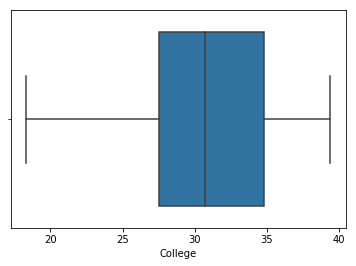

In [8]:
# See the distribution of college level graduates and above in democrat states.
sns.boxplot(democrat_states['College']);

In [9]:
# Sort the democrat state by voter turnout.
democrat_states_education_sort = democrat_states[['state','College', 'Democrat_votes_of_total_votes']].sort_values('Democrat_votes_of_total_votes', ascending = False)
democrat_states_education_sort.head()

,state,College,Democrat_votes_of_total_votes
10,Hawaii,30.1,0.717869
4,California,30.7,0.697142
44,Vermont,34.8,0.695471
30,New Mexico,25.8,0.692358
31,New York,33.2,0.676540


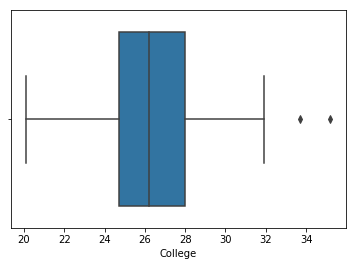

In [10]:
# See the distribution of college graduates and above in republican states.
sns.boxplot(republican_states['College']);

In [11]:
# Sort by voter turnout and list education level to see which states are on the middle 
republican_states_education_sort = republican_states[['state','College', 'Republican_votes_of_total_votes']].sort_values('Republican_votes_of_total_votes', ascending = True)
republican_states_education_sort.head()

,state,College,Republican_votes_of_total_votes
32,North Carolina,27.3,0.507400
48,Wisconsin,26.8,0.517362
21,Michigan,25.9,0.517909
2,Arizona,26.9,0.521581
28,New Hampshire,33.7,0.530700


Education level is higher in democrat states than republican states. In democrat states, about 27%-35% of individuals, 25 years and olders, attained a college degree. Whereas, for republican states, the same was true for only 25%-28%. 

There are 12 republican states where republicans won 60% or less of the votes. These 12 states may be the samples for our experimental design. 

**Rural vs. Urban**

Population_per_square_mile is used here as a measure of population density. The thought process I used was the higher the density the population, the more urban; the less dense, the more rural.

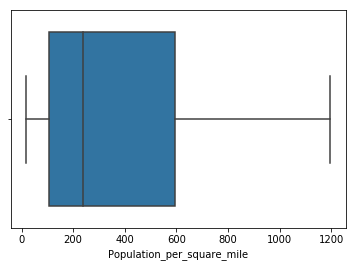

In [12]:
# View of democrat states' population density.
sns.boxplot(democrat_states['Population_per_square_mile']);

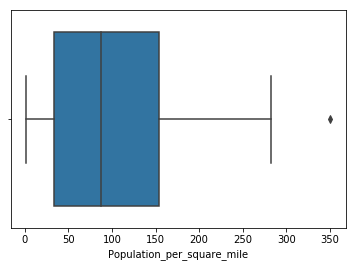

In [13]:
# View of republican states' population density.
sns.boxplot(republican_states['Population_per_square_mile']);

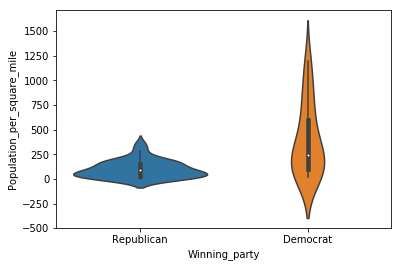

In [14]:
# Comparison view of population density by party.
sns.violinplot(x="Winning_party", y="Population_per_square_mile", data=state_facts);

In [15]:
# Summary statistics for population density of democrat states.
democrat_states['Population_per_square_mile'].describe()

count      17.000000
mean      390.617647
std       364.691375
min        17.000000
25%       104.900000
50%       239.100000
75%       594.800000
max      1195.500000
Name: Population_per_square_mile, dtype: float64

In [16]:
# Summary statistics of population density of republican states.
republican_states['Population_per_square_mile'].describe()

count     29.000000
mean     101.368966
std       87.044907
min        1.200000
25%       33.600000
50%       87.100000
75%      153.900000
max      350.600000
Name: Population_per_square_mile, dtype: float64

In [17]:
# Sort by voter turnout and list education level to see which states are on the middle 
republican_states_popdensity_sort = republican_states[['state', 'Population_per_square_mile', 'Republican_votes_of_total_votes']].sort_values('Population_per_square_mile', ascending = True)
republican_states_popdensity_sort.head()

,state,Population_per_square_mile,Republican_votes_of_total_votes
1,Alaska,1.2,0.976011
49,Wyoming,5.8,0.763314
25,Montana,6.8,0.540370
40,South Dakota,10.7,0.557862
11,Idaho,19.0,0.900811


Republican states are more rural than democrat states. Population per squre mile is approximately 33 to 154 people in republican states, whereas, it is approximately 105 to 595 people in democrat states. The mean population density for republican and democrat states are 101 and 390, respectively. 

Rural republican states, states with low population density, will also be an area of focus for the experimental design.

**Social Economic Status**

We will explore how poverty and median household income varies by party.

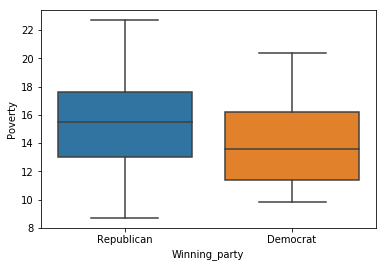

In [18]:
# Create boxplot of poverty rates by party.
sns.boxplot(x="Winning_party", y="Poverty", data=state_facts);

Republican more povertized than democrat.

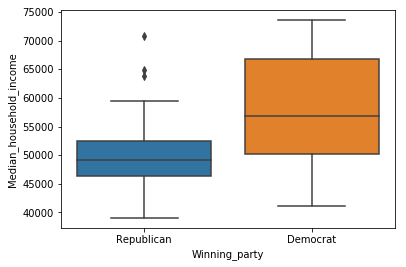

In [19]:
# Create boxplot of median household income by party.
sns.boxplot(x="Winning_party", y="Median_household_income", data=state_facts);

in democrat states, people have a higher median household income compared to republican states. This makes sense with our findings of democrat states being more urban than rural; and cities typically pay higher salaries than remote locations in the US.

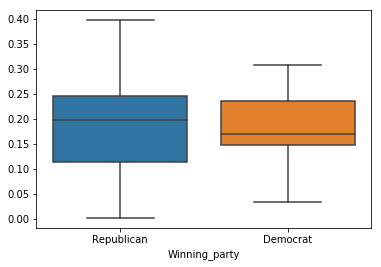

In [20]:
# See voter turnout. 
voter_turnout = state_facts['total_votes']/state_facts['Population_2014']

sns.boxplot(x="Winning_party", y=voter_turnout, data=state_facts);

For the experimental design, the primary measure of outcome will be votes. However, voter turnout will also be used as a secondary measure to gauge the impact of the  treatment. 

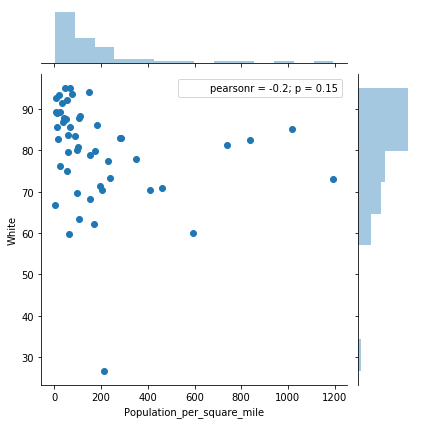

In [21]:
# Explore relationship between pop density and Whites.
sns.jointplot(x="Population_per_square_mile", y="White", data=state_facts);

Overall, across the US, Whites are more represented in rural areas. Whites may be the primary community of focus for our experimental design.

### Preliminary Conclusions from Findings

From our findings, we have discovered republican states have lower educational attainment, live is rural areas and have lower social economic status. Also, white communities may be the focus of our treatment if this group is most represented in rural areas. 

As a results, for our experiment strategy, we should narrow our focus to white, rural communities who experience low-income levels. The sample states for our experiment design should have the following critera:
* Predominantly white
* Very rural (i.e. low population density)
* Primary result was very close (more on this in experimental design section)

Based on these criteria, the two states we will choose for our sample are Montana and South Dakota.

In [22]:
# View facts for Montana.
Montana = state_facts[(state_facts['state'] == 'Montana')]
Montana

,fips,state,Population_2014,18_and_younger,Female,White,Minority,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Hispanic_or_Latino,White_not_Hispanic_or_Latino,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,Democrat_votes,Democrat_votes_of_total_votes,Democrat_votes_of_pop,Republican_votes,Republican_votes_of_total_votes,Republican_votes_of_pop,total_votes,Winning_party
25,30000,Montana,1023579,22.0,49.8,89.4,10.7,0.6,6.6,0.8,0.1,2.6,3.5,86.7,2.0,4.4,92.1,28.7,94404,18.0,46230,15.2,114398,0.2,2.0,0.6,0.0,1.0,24.6,6.8,118362.0,0.45963,0.115635,139154.0,0.54037,0.135948,257516,Republican


In [23]:
# View facts for South Dakota.
South_Dakota = state_facts[(state_facts['state'] == 'South Dakota')]
South_Dakota

,fips,state,Population_2014,18_and_younger,Female,White,Minority,Black,American_Indian_Alaskan_Native,Asian,Native_Hawaiian_Pacific_Islander,Two_or_More_Races,Hispanic_or_Latino,White_not_Hispanic_or_Latino,Foreign_born_persons,Language_other_than_English_spoken_at_home,High_school,College,Veterans,Commute,Median_household_income,Poverty,Total_number_of_firms,Black_owned_firms,American_Indian_Alaska_Native_owned_firms,Asian_owned_firms,Native_Hawaiian_and_Other_Pacific_Islander_owned_firms,Hispanic_owned_firms,Women_owned_firms,Population_per_square_mile,Democrat_votes,Democrat_votes_of_total_votes,Democrat_votes_of_pop,Republican_votes,Republican_votes_of_total_votes,Republican_votes_of_pop,total_votes,Winning_party
40,46000,South Dakota,853175,24.7,49.7,85.7,14.4,1.9,8.9,1.3,0.1,2.2,3.6,83.0,2.8,6.8,90.4,26.2,67886,16.9,49495,14.1,76997,0.3,2.2,0.6,0.0,0.8,22.2,10.7,53004.0,0.442138,0.062126,66877.0,0.557862,0.078386,119881,Republican


**Base Criteria**
* Predominantly White: Montana (89%), South Dakota (86%)
* Very Rural: Montana and South Dakota both ranks in bottom four states for population density
* Primary results very close: Republican votes out of total votes for Montana (54%) and South Dakota (56%)

*Other facts*
* College or above: Montana (29%), South Dakota (27%)
* Poverty: Montana (15%), South Dakota (14%)
* Median household income: Montana (\$46,230), South Dakota (\$49,495)

## Experimental Design

Using our findings from above, I will now present an experimental design using the following structure: 
* Problem statement, solution, hypothesis 
* Rollout Plan: control and treatment group, treatment, check-ins
* Outcomes of Success: primary measures, secondary measures, method
* Evaluation Plan